In [44]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
seed = 42

In [45]:
data = pd.read_csv("datass/dataset.csv")

In [46]:
data = data[(data['Education_Level'] != 'Unknown') 
            & (data['Income_Category'] != 'Unknown') 
            & (data['Marital_Status'] != 'Unknown')]


In [47]:
variables_to_keep = [
    'Dependent_count',
    'Gender',
    'Income_Category',
    'Customer_Age',
    'Marital_Status',
    'Education_Level',
    'Attrition_Flag'
]
data_subset = data.loc[:, variables_to_keep]

In [48]:
# Conversione delle variabili categoriche in tipo "category"
data_subset['Gender'] = data_subset['Gender'].astype('category')
data_subset['Income_Category'] = data_subset['Income_Category'].astype('category')
data_subset['Marital_Status'] = data_subset['Marital_Status'].astype('category')
data_subset['Education_Level'] = data_subset['Education_Level'].astype('category')
data_subset['Attrition_Flag'] = data_subset['Attrition_Flag'].astype('category')

# Stampa dei tipi di dati delle colonne nel dataset
print(data_subset.dtypes)

Dependent_count       int64
Gender             category
Income_Category    category
Customer_Age          int64
Marital_Status     category
Education_Level    category
Attrition_Flag     category
dtype: object


In [51]:
df = data_subset.drop(['Attrition_Flag'], axis = 1)
df_att = pd.DataFrame()
# Creazione di un oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle categorie in numeri
df['Gender'] = label_encoder.fit_transform(data_subset['Gender'])
df['Income_Category'] = label_encoder.fit_transform(data_subset['Income_Category'])
df['Marital_Status'] = label_encoder.fit_transform(data_subset['Marital_Status'])
df['Education_Level'] = label_encoder.fit_transform(data_subset['Education_Level'])
df_att['Attrition_Flag'] = label_encoder.fit_transform(data_subset['Attrition_Flag'])
print(df.dtypes)

Dependent_count    int64
Gender             int64
Income_Category    int64
Customer_Age       int64
Marital_Status     int64
Education_Level    int64
dtype: object


In [52]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Stampa i centroidi dei cluster
print(kmeans.cluster_centers_)

[[ 2.17869763  0.53508329  2.6365472  36.54871277  1.36698637  2.6027259 ]
 [ 2.81003471  0.52035342  2.58094036 46.46102872  1.2903124   2.56579363]
 [ 1.72604868  0.51631279  2.58415329 56.21439669  1.3790782   2.56654583]]


In [53]:
import warnings
warnings.filterwarnings("ignore")

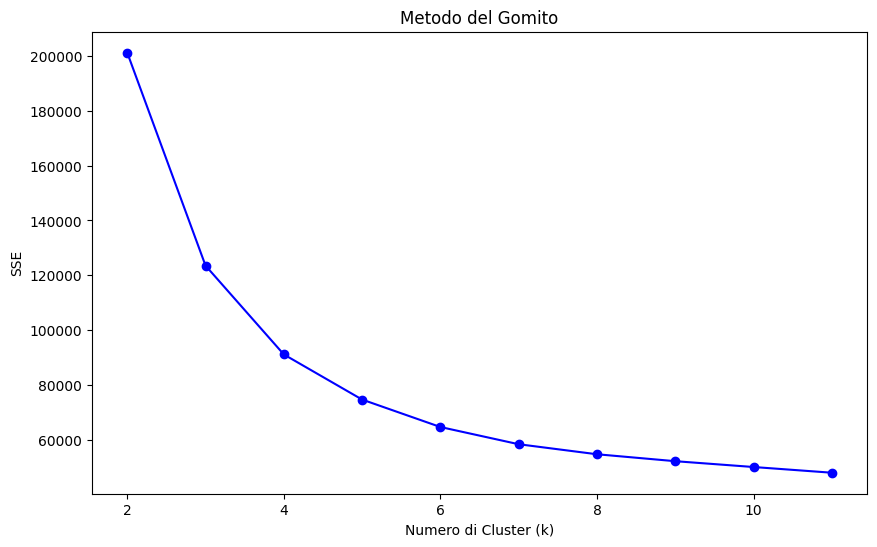

In [54]:
sse = []
k_values = range(2, 12)  # valori di k da testare

# Esegui il k-means clustering per vari valori di k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # SSE

# Visualizza la curva del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE')
plt.title('Metodo del Gomito')
plt.show()


In [55]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labels = kmeans.labels_
data_subset['Cluster_Labels'] = labels

<Figure size 800x600 with 0 Axes>

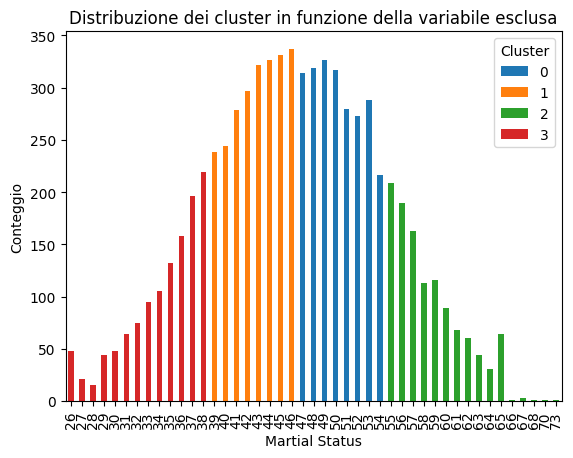

In [62]:
plt.figure(figsize=(8, 6))
data_subset.groupby('Customer_Age')['Cluster_Labels'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Martial Status')
plt.ylabel('Conteggio')
plt.title('Distribuzione dei cluster in funzione della variabile esclusa')
plt.legend(title='Cluster')
plt.show()